# **Evaluation of Model Dimentions**  

(d_model, num_heads, dff)  
  
  

## **Contents**
1. [Importing Libraries](evaluation_of_feature_enhancement.ipynb#1-importing-libraries)  
   
2. [Load Results](evaluation_of_feature_enhancement.ipynb#2-load-results)  
   
3. [RMSE and MAE](evaluation_of_feature_enhancement.ipynb#3-rmse-and-mae)  

  
4. [CG-EGA Summary Classification](evaluation_of_feature_enhancement.ipynb#4-cg-ega-summary-classification)
   - 4.1 [CG-EGA Summary Classification Statistical Analysis](evaluation_of_feature_enhancement.ipynb#4.1-cg-ega-summary-classification-statistical-analysis)  
  


## **1. Importing Libraries**

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from IPython.display import display

current_dir = os.getcwd()
PROJECT_ROOT = os.path.abspath(os.path.join(current_dir, "../../../../../"))

sys.path.append(os.path.join(PROJECT_ROOT, "shared_utilities"))
from metrics import *

## **2. Load Results**

In [ ]:
"""10 epochs"""

dir_10_epochs = os.path.join(PROJECT_ROOT, "models/jpformer/development_training_files/epochs/10epochs")

full_results_10_epochs = pd.read_csv(os.path.join(dir_10_epochs, "detailed_results_table.csv"))

"""20 epochs"""
dir_20_epochs = os.path.join(PROJECT_ROOT, "models/jpformer/development_training_files/epochs/20epochs")
full_results_20_epochs = pd.read_csv(os.path.join(dir_20_epochs, "detailed_results_table.csv"))

"""30 epochs"""
dir_30_epochs = os.path.join(PROJECT_ROOT, "models/jpformer/development_training_files/epochs/30epochs")
full_results_30_epochs = pd.read_csv(os.path.join(dir_30_epochs, "detailed_results_table.csv"))

"""40 epochs"""
dir_40_epochs = os.path.join(PROJECT_ROOT, "models/jpformer/development_training_files/epochs/40epochs")
full_results_40_epochs = pd.read_csv(os.path.join(dir_40_epochs, "detailed_results_table.csv"))

"""50 epochs"""
dir_50_epochs = os.path.join(PROJECT_ROOT, "models/jpformer/development_training_files/epochs/50epochs")
full_results_50_epochs = pd.read_csv(os.path.join(dir_50_epochs, "detailed_results_table.csv"))

"""15 epochs"""
dir_15_epochs = os.path.join(PROJECT_ROOT, "models/jpformer/development_training_files/epochs/15epochs")
full_results_15_epochs = pd.read_csv(os.path.join(dir_15_epochs, "detailed_results_table.csv"))




In [ ]:
full_results_10_epochs.head()

## **3. RMSE and MAE**

In [ ]:
# Define a simple RMSE function
def calculate_rmse(true_glucose, predicted_glucose):
    return np.sqrt(np.mean((true_glucose - predicted_glucose) ** 2))

rmse_10_epochs = calculate_rmse(full_results_10_epochs["true_glucose"], full_results_10_epochs["predicted_glucose"])
rmse_20_epochs = calculate_rmse(full_results_20_epochs["true_glucose"], full_results_20_epochs["predicted_glucose"])
rmse_30_epochs = calculate_rmse(full_results_30_epochs["true_glucose"], full_results_30_epochs["predicted_glucose"])
rmse_40_epochs = calculate_rmse(full_results_40_epochs["true_glucose"], full_results_40_epochs["predicted_glucose"])
rmse_50_epochs = calculate_rmse(full_results_50_epochs["true_glucose"], full_results_50_epochs["predicted_glucose"])
rmse_15_epochs = calculate_rmse(full_results_15_epochs["true_glucose"], full_results_15_epochs["predicted_glucose"])

In [ ]:
def mae(true, predicted):
    return np.mean(np.abs(predicted - true))

mae_10_epochs = mae(full_results_10_epochs["true_glucose"], full_results_10_epochs["predicted_glucose"])
mae_20_epochs = mae(full_results_20_epochs["true_glucose"], full_results_20_epochs["predicted_glucose"])
mae_30_epochs = mae(full_results_30_epochs["true_glucose"], full_results_30_epochs["predicted_glucose"])
mae_40_epochs = mae(full_results_40_epochs["true_glucose"], full_results_40_epochs["predicted_glucose"])
mae_50_epochs = mae(full_results_50_epochs["true_glucose"], full_results_50_epochs["predicted_glucose"])
mae_15_epochs = mae(full_results_15_epochs["true_glucose"], full_results_15_epochs["predicted_glucose"])


In [ ]:
rmse_mae_table = pd.DataFrame({
    "Model": ["10_epochs", "20_epochs", "30_epochs", "40_epochs", "50_epochs", "15_epochs"],
    "RMSE": [rmse_10_epochs, rmse_20_epochs, rmse_30_epochs, rmse_40_epochs, rmse_50_epochs, rmse_15_epochs],
    "MAE": [mae_10_epochs, mae_20_epochs, mae_30_epochs, mae_40_epochs, mae_50_epochs, mae_15_epochs]
})

rmse_mae_table

In [ ]:
# Update model names in the DataFrame
rmse_mae_table['Model'] = ["10 epochs", "20 epochs", "30 epochs", "40 epochs", "50 epochs", "15 epochs"]

# Plot comparison column chart for RMSE and MAE and display in a 2x1 grid
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Define custom colors for the models
palette = sns.color_palette("Set1", n_colors=len(rmse_mae_table))
# Set the style of seaborn
sns.set(style="whitegrid")
# Set the font scale for the plots
sns.set_context("notebook", font_scale=1.2)

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=rmse_mae_table, ax=axs[0], palette=palette)
axs[0].set_title('RMSE', fontsize=10, fontweight='bold')
axs[0].set_ylabel('RMSE (mg/dL)', fontsize=8)
axs[0].set_xlabel('')  # Remove x-axis label

# Plot MAE
sns.barplot(x='Model', y='MAE', data=rmse_mae_table, ax=axs[1], palette=palette)
axs[1].set_title('MAE', fontsize=10, fontweight='bold')
axs[1].set_ylabel('MAE (mg/dL)', fontsize=8)
axs[1].set_xlabel('')  # Remove x-axis label

# Set y-axis limits and add data labels
for ax in axs:
    ax.set_ylim(0, 50)  # Adjusted to better fit the data range
    # Make tick labels smaller
    ax.tick_params(axis='both', labelsize=7)
    # Add data labels
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8, fontweight='bold')
    # Remove top and right borders
    sns.despine(ax=ax)

# Add a suptitle
plt.suptitle('JPFormer: RMSE and MAE for Respective Loss Functions', 
             fontsize=12, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust to make room for the title
plt.subplots_adjust(bottom=0.2)  # Adjust to make room for the title
plt.show()


## **4. CG-EGA Summary Classifications**

In [20]:
full_results_10_epochs['AP'] = np.where(full_results_10_epochs['CG_EGA_Class'] == 'AP', 1, 0)
full_results_10_epochs['BE'] = np.where(full_results_10_epochs['CG_EGA_Class'] == 'BE', 1, 0)
full_results_10_epochs['EP'] = np.where(full_results_10_epochs['CG_EGA_Class'] == 'EP', 1, 0)

full_results_20_epochs['AP'] = np.where(full_results_20_epochs['CG_EGA_Class'] == 'AP', 1, 0)
full_results_20_epochs['BE'] = np.where(full_results_20_epochs['CG_EGA_Class'] == 'BE', 1, 0)
full_results_20_epochs['EP'] = np.where(full_results_20_epochs['CG_EGA_Class'] == 'EP', 1, 0)

full_results_30_epochs['AP'] = np.where(full_results_30_epochs['CG_EGA_Class'] == 'AP', 1, 0)
full_results_30_epochs['BE'] = np.where(full_results_30_epochs['CG_EGA_Class'] == 'BE', 1, 0)
full_results_30_epochs['EP'] = np.where(full_results_30_epochs['CG_EGA_Class'] == 'EP', 1, 0)

full_results_40_epochs['AP'] = np.where(full_results_40_epochs['CG_EGA_Class'] == 'AP', 1, 0)
full_results_40_epochs['BE'] = np.where(full_results_40_epochs['CG_EGA_Class'] == 'BE', 1, 0)
full_results_40_epochs['EP'] = np.where(full_results_40_epochs['CG_EGA_Class'] == 'EP', 1, 0)

full_results_50_epochs['AP'] = np.where(full_results_50_epochs['CG_EGA_Class'] == 'AP', 1, 0)
full_results_50_epochs['BE'] = np.where(full_results_50_epochs['CG_EGA_Class'] == 'BE', 1, 0)
full_results_50_epochs['EP'] = np.where(full_results_50_epochs['CG_EGA_Class'] == 'EP', 1, 0)

full_results_15_epochs['AP'] = np.where(full_results_15_epochs['CG_EGA_Class'] == 'AP', 1, 0)
full_results_15_epochs['BE'] = np.where(full_results_15_epochs['CG_EGA_Class'] == 'BE', 1, 0)
full_results_15_epochs['EP'] = np.where(full_results_15_epochs['CG_EGA_Class'] == 'EP', 1, 0)

Overall Summary:


,Model,AP,BE,EP,Count,AP_pct,BE_pct,EP_pct,AP:EP
0,10 epochs,3093914,183342,128248,3405504,90.850400,5.383697,3.765904,24.124462
1,15 epochs,3122615,171562,111327,3405504,91.693183,5.037786,3.269032,28.049036
2,20 epochs,3110823,176217,118464,3405504,91.346920,5.174476,3.478604,26.259649
3,30 epochs,3140377,165724,99403,3405504,92.214750,4.866358,2.918892,31.592376
4,40 epochs,3139980,164347,101177,3405504,92.203092,4.825923,2.970985,31.034524
5,50 epochs,3132567,166658,106279,3405504,91.985415,4.893784,3.120801,29.474939



Hypo Region Summary:


,Model,AP,BE,EP,Count,AP_pct,BE_pct,EP_pct,AP:EP
0,10 epochs,106880,5275,12894,125049,85.470496,4.218346,10.311158,8.289127
1,15 epochs,110952,4664,9433,125049,88.726819,3.729738,7.543443,11.762112
2,20 epochs,109879,5255,9915,125049,87.868755,4.202353,7.928892,11.082098
3,30 epochs,110280,4911,9858,125049,88.189430,3.927261,7.883310,11.186853
4,40 epochs,110471,4884,9694,125049,88.342170,3.905669,7.752161,11.395812
5,50 epochs,109543,4855,10651,125049,87.600061,3.882478,8.517461,10.284762



Eu Region Summary:


,Model,AP,BE,EP,Count,AP_pct,BE_pct,EP_pct,AP:EP
0,10 epochs,2026900,118222,63638,2208760,91.766421,5.352415,2.881164,31.850467
1,15 epochs,2042066,112200,54494,2208760,92.453051,5.079773,2.467176,37.473226
2,20 epochs,2035908,113958,58894,2208760,92.174252,5.159365,2.666383,34.569022
3,30 epochs,2052206,106887,49667,2208760,92.912132,4.839231,2.248637,41.319307
4,40 epochs,2051723,107261,49776,2208760,92.890264,4.856164,2.253572,41.219122
5,50 epochs,2048027,108426,52307,2208760,92.722931,4.908908,2.368161,39.153976



Hyper Region Summary:


,Model,AP,BE,EP,Count,AP_pct,BE_pct,EP_pct,AP:EP
0,10 epochs,960134,59845,51716,1071695,89.590229,5.584145,4.825627,18.565512
1,15 epochs,969597,54698,47400,1071695,90.473222,5.103878,4.422900,20.455633
2,20 epochs,965036,57004,49655,1071695,90.047635,5.319051,4.633315,19.434820
3,30 epochs,977891,53926,39878,1071695,91.247137,5.031842,3.721021,24.522067
4,40 epochs,977786,52202,41707,1071695,91.237339,4.870975,3.891686,23.444170
5,50 epochs,974997,53377,43321,1071695,90.977097,4.980615,4.042288,22.506336


/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:77: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:77: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:77: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:77: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


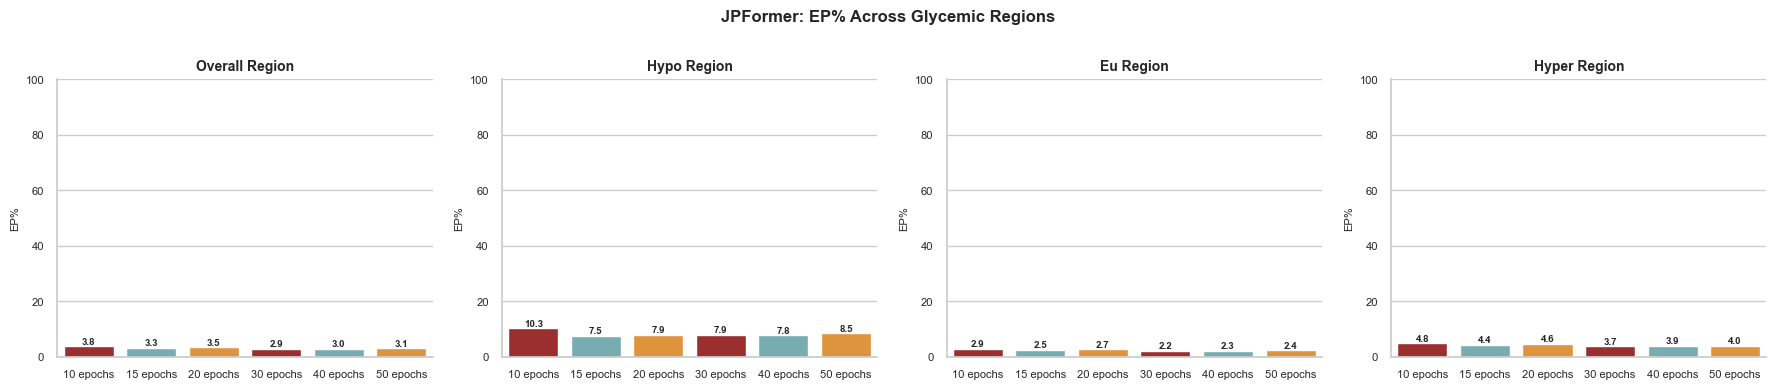

/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:110: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:110: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:110: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:110: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


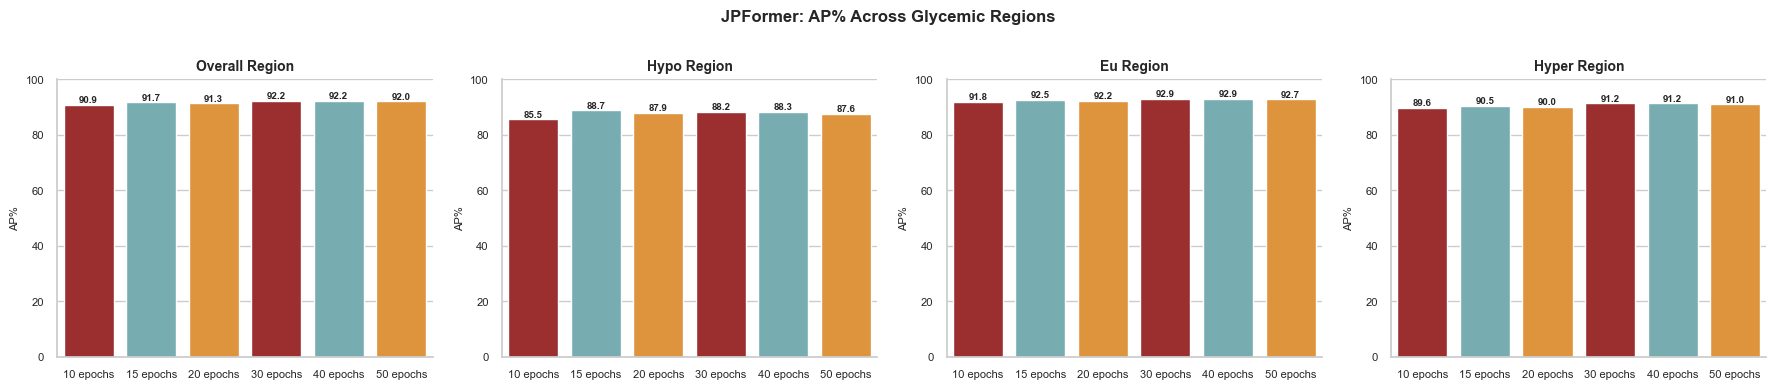

/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:144: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:144: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:144: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/2129321331.py:144: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


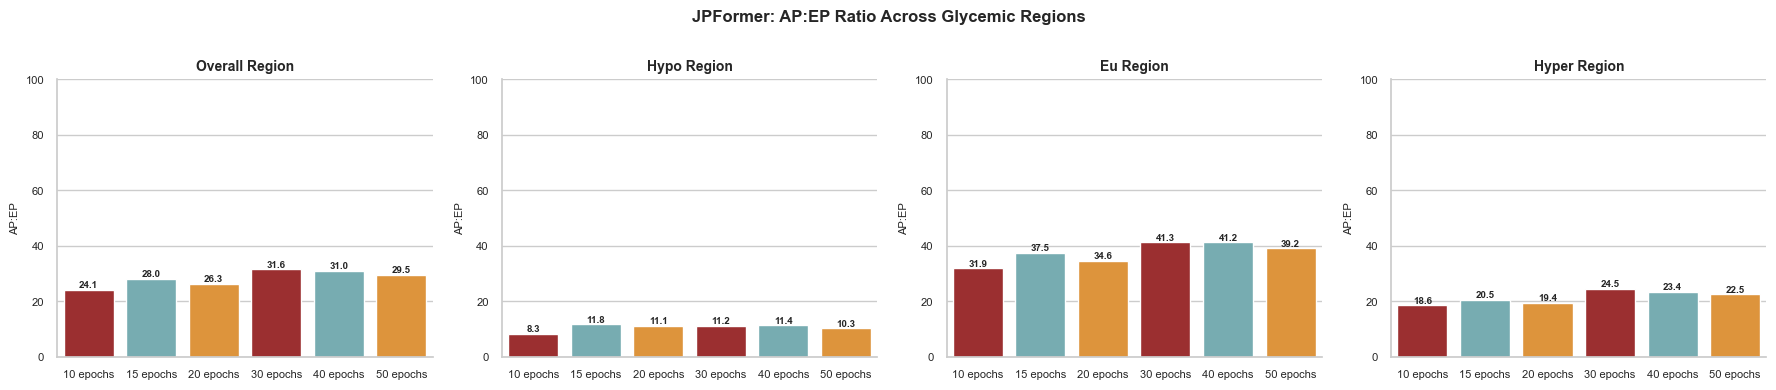

In [21]:

pallete = sns.color_palette("Set1", n_colors=6)

# Create summary tables for overall, hypo, eu, and hyper glycaemic regions
regions = ['overall', 'hypo', 'eu', 'hyper']
summary_tables = {}

# List of models and their corresponding data
models = ['10 epochs', '15 epochs', '20 epochs', '30 epochs', '40 epochs', '50 epochs']
dataframes = [
    full_results_10_epochs,
    full_results_15_epochs,
    full_results_20_epochs,
    full_results_30_epochs,
    full_results_40_epochs,
    full_results_50_epochs
]

for region in regions:
    # Initialize empty DataFrame with specific dtypes to avoid warning
    summary_df = pd.DataFrame({
        'Model': pd.Series(dtype='object'),
        'AP': pd.Series(dtype='int64'), 
        'BE': pd.Series(dtype='int64'), 
        'EP': pd.Series(dtype='int64'), 
        'Count': pd.Series(dtype='int64'),
        'AP_pct': pd.Series(dtype='float64'), 
        'BE_pct': pd.Series(dtype='float64'), 
        'EP_pct': pd.Series(dtype='float64')
    })
    
    # Process each model
    for model, df in zip(models, dataframes):
        # Filter for region if not overall
        if region != 'overall':
            region_df = df[df['glycemic_region'] == region]
        else:
            region_df = df
            
        # Calculate counts
        ap_count = region_df['AP'].sum()
        be_count = region_df['BE'].sum()
        ep_count = region_df['EP'].sum()
        total_count = len(region_df)
        
        # Create a new row as a dictionary and append it to the DataFrame
        new_row = {
            'Model': model, 
            'AP': ap_count, 
            'BE': be_count, 
            'EP': ep_count, 
            'Count': total_count,
            'AP:EP': ap_count / ep_count if ep_count != 0 else np.nan,
            'AP_pct': ap_count / total_count * 100, 
            'BE_pct': be_count / total_count * 100, 
            'EP_pct': ep_count / total_count * 100
        }
        summary_df = pd.concat([summary_df, pd.DataFrame([new_row])], ignore_index=True)
    
    # Store in dictionary
    summary_tables[region] = summary_df

# Display overall summary
cg_ega_overall_summary_df = summary_tables['overall']
print("Overall Summary:")
display(cg_ega_overall_summary_df)

# Display other region summaries
for region in ['hypo', 'eu', 'hyper']:
    print(f"\n{region.capitalize()} Region Summary:")
    display(summary_tables[region])

# Create figure for visualizing EP percentages across regions
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot EP percentages for each region
for i, region in enumerate(regions):
    sns.barplot(
        x='Model', 
        y='EP_pct', 
        data=summary_tables[region], 
        ax=axs[i], 
        palette=palette,
        hue='Model',
        legend=False
    )
    axs[i].set_title(f'{region.capitalize()} Region', fontsize=10, fontweight='bold')
    axs[i].set_ylabel('EP%', fontsize=8)
    axs[i].set_xlabel('')  # Remove x-axis label
    axs[i].set_ylim(0, 100)  # Adjust y-axis limit for better visualization
    axs[i].tick_params(axis='both', labelsize=8)
    
    # Add data labels
    for p in axs[i].patches:
        axs[i].annotate(f"{p.get_height():.1f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=7, fontweight='bold')
    
    # Remove top and right borders
    sns.despine(ax=axs[i])

plt.suptitle('JPFormer: EP% Across Glycemic Regions',
             fontsize=12, fontweight='bold')
plt.subplots_adjust(top=0.85)  # Adjust to make room for the title
plt.tight_layout()
plt.show()

# Create figure for visualizing AP percentages across regions
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
for i, region in enumerate(regions):
    sns.barplot(
        x='Model', 
        y='AP_pct', 
        data=summary_tables[region], 
        ax=axs[i], 
        palette=palette,
        hue='Model',
        legend=False
    )
    axs[i].set_title(f'{region.capitalize()} Region', fontsize=10, fontweight='bold')
    axs[i].set_ylabel('AP%', fontsize=8)
    axs[i].set_xlabel('')  # Remove x-axis label
    axs[i].set_ylim(0, 100)  # Adjust y-axis limit for better visualization
    axs[i].tick_params(axis='both', labelsize=8)
    
    # Add data labels
    for p in axs[i].patches:
        axs[i].annotate(f"{p.get_height():.1f}", 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom', fontsize=7, fontweight='bold')
    
    # Remove top and right borders
    sns.despine(ax=axs[i])

plt.suptitle('JPFormer: AP% Across Glycemic Regions',
             fontsize=12, fontweight='bold')
plt.subplots_adjust(top=0.85)  # Adjust to make room for the title
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Plot AP:EP ratio for each region
for i, region in enumerate(regions):
    sns.barplot(
        x='Model', 
        y='AP:EP', 
        data=summary_tables[region], 
        ax=axs[i], 
        palette=palette,
        hue='Model',
        dodge=False
    )
    axs[i].set_title(f'{region.capitalize()} Region', fontsize=10, fontweight='bold')
    axs[i].set_ylabel('AP:EP', fontsize=8)
    axs[i].set_xlabel('')  # Remove x-axis label
    axs[i].set_ylim(0, 100)  # Adjust y-axis limit for better visualization
    axs[i].tick_params(axis='both', labelsize=8)
    
    # Add data labels
    for p in axs[i].patches:
        axs[i].annotate(f"{p.get_height():.1f}", 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=7, fontweight='bold')
    
    # Remove top and right borders
    sns.despine(ax=axs[i])

plt.suptitle('JPFormer: AP:EP Ratio Across Glycemic Regions',
             fontsize=12, fontweight='bold')
plt.subplots_adjust(top=0.85)  # Adjust to make room for the title
plt.tight_layout()
plt.show()

In [ ]:
def create_timepoint_ega_dataframe(df, region=None):
    # Initialize a dataframe to store results with proper data types
    result_df = pd.DataFrame(index=(np.arange(24)+1) * 5)  # timepoints (n+1) * 5
    result_df.index.name = 'timepoint'
    
    # Initialize columns for percentages, counts and total
    result_df['AP_percent'] = 0.0
    result_df['BP_percent'] = 0.0
    result_df['EP_percent'] = 0.0
    result_df['AP_count'] = 0
    result_df['BP_count'] = 0
    result_df['EP_count'] = 0
    result_df['Total_count'] = 0
    
    # Create a copy of the dataframe to avoid modifying the original
    df = df.copy()

    if region == 'hypo':
        # Filter for hypoglycemic readings only
        df = df[df['glycemic_region'] == 'hypo']
    elif region == 'hyper':
        # Filter for hyperglycemic readings only
        df = df[df['glycemic_region'] == 'hyper']
    elif region == 'eu':
        # Filter for euglycemic readings only
        df = df[df['glycemic_region'] == 'eu']
    else:
        df = df  # Use all data

    # Process each timepoint
    for timepoint in range(24):
        # Filter data for this timepoint
        timepoint_data = df[df['timepoint'] == timepoint]
        
        if len(timepoint_data) > 0:
            # Count occurrences of each CG_EGA_Class
            class_counts = timepoint_data['CG_EGA_Class'].value_counts()
            total_points = len(timepoint_data)
            
            # Store total count for this timepoint
            result_df.loc[(timepoint + 1) * 5, 'Total_count'] = total_points
            
            # Calculate percentages and counts for AP, BP, and EP
            for class_prefix in ['A', 'B', 'E']:
                # Find all classes that start with this letter (AP, BP, EP)
                class_matches = [c for c in class_counts.index if c.startswith(class_prefix)]
                count = sum([class_counts[c] for c in class_matches if c in class_counts])
                
                # Store count
                result_df.loc[(timepoint + 1) * 5, f'{class_prefix}P_count'] = count
                
                # Store percentage
                result_df.loc[(timepoint + 1) * 5, f'{class_prefix}P_percent'] = float((count / total_points) * 100)
    
    return result_df


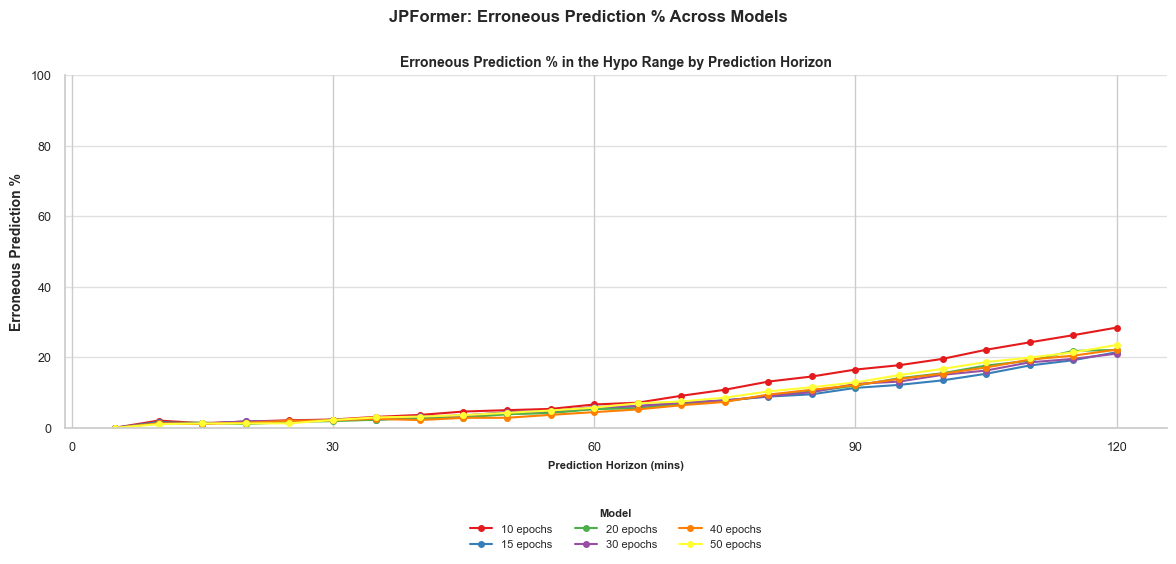

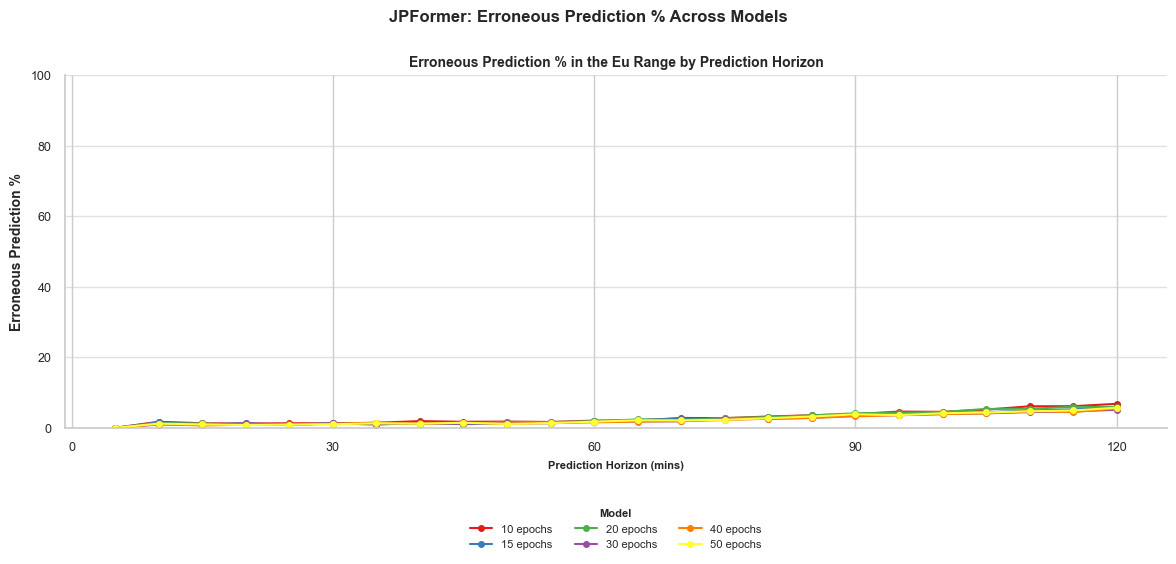

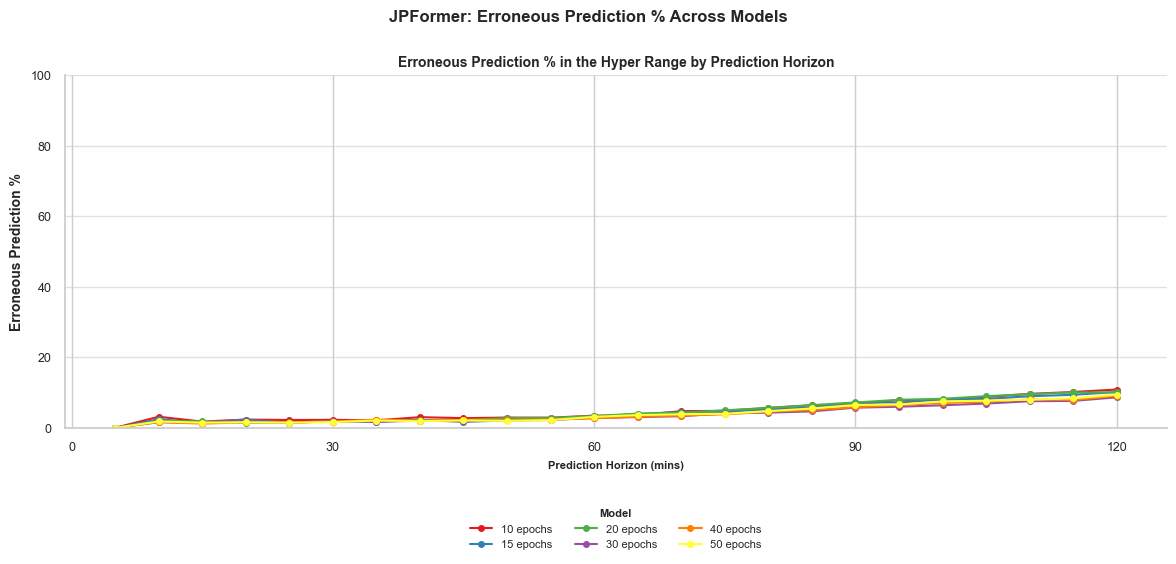

In [26]:
def return_ph_chart(models, glycemic_region):
    # Define custom colors for the models
    colors = sns.color_palette("Set1", n_colors=len(models))

    # Initialize the plot
    plt.figure(figsize=(12, 6))

    # Iterate through each model and plot its Erroneous Prediction %
    for model, color in zip(models, colors):
        timepoint_table = create_timepoint_ega_dataframe(model['data'], glycemic_region)
        plt.plot(
            timepoint_table.index, 
            timepoint_table['EP_percent'], 
            label=model['name'], 
            marker='o', 
            linestyle='-', 
            markersize=4, 
            color=color
        )

    # Add titles and labels
    plt.suptitle('JPFormer: Erroneous Prediction % Across Models', fontsize=12, fontweight='bold')
    plt.title(f'Erroneous Prediction % in the {glycemic_region.capitalize()} Range by Prediction Horizon', 
              fontsize=10, fontweight='bold', ha='center')
    plt.xlabel('Prediction Horizon (mins)', fontsize=8, fontweight='bold', labelpad=5, ha='center')
    plt.ylabel('Erroneous Prediction %', fontsize=10, fontweight='bold', labelpad=5)
    plt.xticks(range(0, 121, 30), fontsize=9)
    plt.yticks(fontsize=9)

    # Format legend
    legend = plt.legend(title='Model', fontsize=8, loc='upper center', bbox_to_anchor=(0.5, -0.2), 
                        ncol=3, frameon=False)
    legend.get_title().set_fontweight('bold')
    legend.get_title().set_fontsize(8)

    # Add grid and styling
    plt.grid(axis='y', linestyle='-', alpha=0.6)
    plt.ylim(0, 100)  # Adjust y-limit based on your data
    sns.despine()  # Remove top and right borders
    plt.tight_layout()
    plt.show()

# Example usage
models = [
    {'name': '10 epochs', 'data': full_results_10_epochs},
    {'name': '15 epochs', 'data': full_results_15_epochs},
    {'name': '20 epochs', 'data': full_results_20_epochs},
    {'name': '30 epochs', 'data': full_results_30_epochs},
    {'name': '40 epochs', 'data': full_results_40_epochs},
    {'name': '50 epochs', 'data': full_results_50_epochs},
]

return_ph_chart(models, glycemic_region='hypo')
return_ph_chart(models, glycemic_region='eu')
return_ph_chart(models, glycemic_region='hyper')


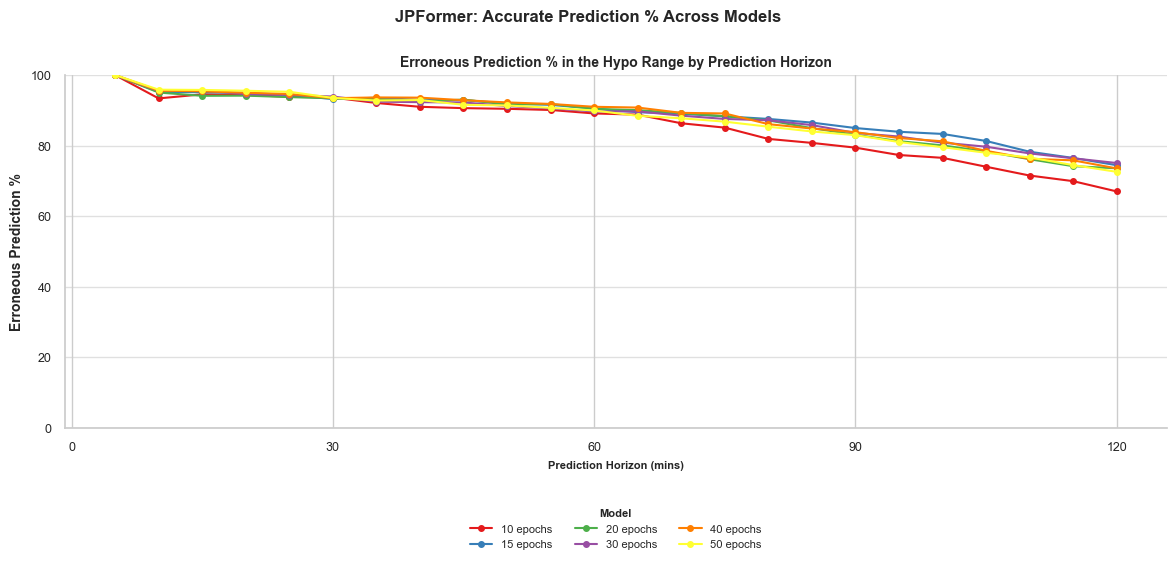

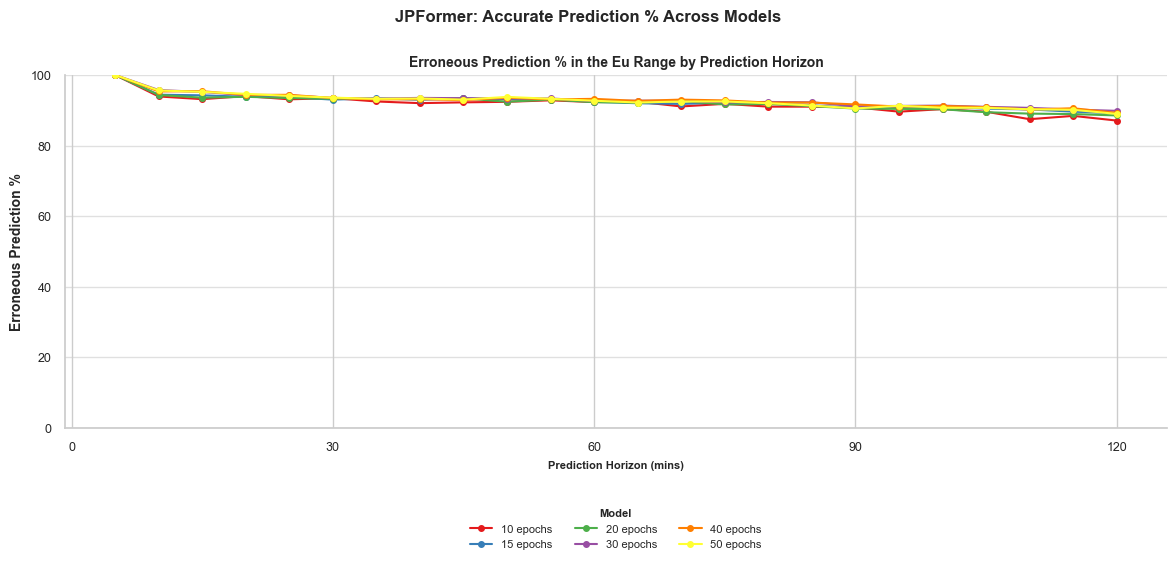

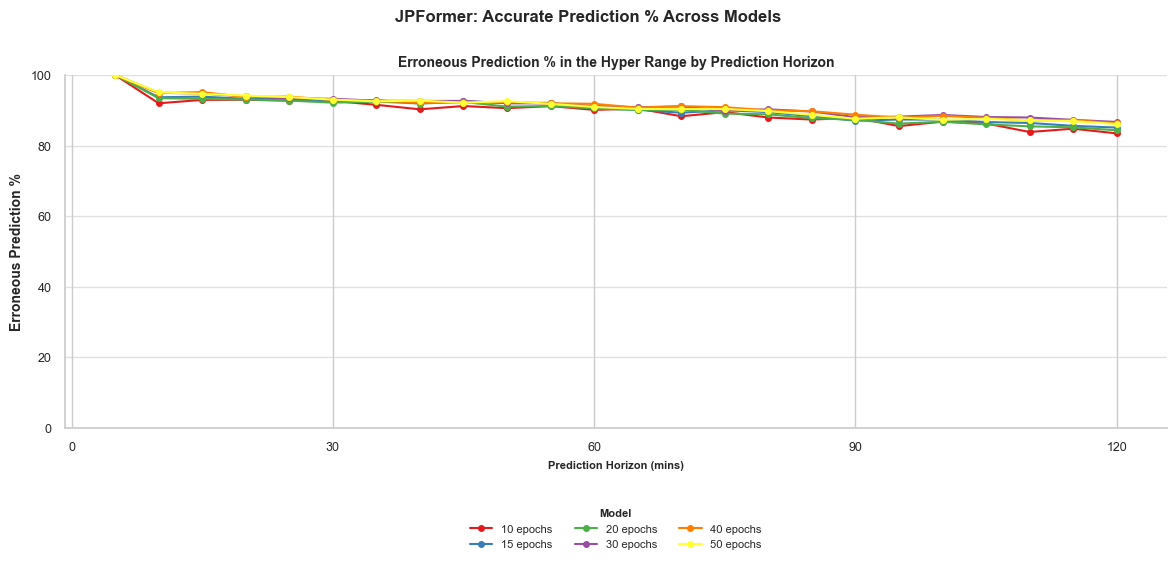

In [27]:
def return_ph_chart(models, glycemic_region):
    # Define custom colors for the models
    colors = sns.color_palette("Set1", n_colors=len(models))

    # Initialize the plot
    plt.figure(figsize=(12, 6))

    # Iterate through each model and plot its Erroneous Prediction %
    for model, color in zip(models, colors):
        timepoint_table = create_timepoint_ega_dataframe(model['data'], glycemic_region)
        plt.plot(
            timepoint_table.index, 
            timepoint_table['AP_percent'], 
            label=model['name'], 
            marker='o', 
            linestyle='-', 
            markersize=4, 
            color=color
        )

    # Add titles and labels
    plt.suptitle('JPFormer: Accurate Prediction % Across Models', fontsize=12, fontweight='bold')
    plt.title(f'Erroneous Prediction % in the {glycemic_region.capitalize()} Range by Prediction Horizon', 
              fontsize=10, fontweight='bold', ha='center')
    plt.xlabel('Prediction Horizon (mins)', fontsize=8, fontweight='bold', labelpad=5, ha='center')
    plt.ylabel('Erroneous Prediction %', fontsize=10, fontweight='bold', labelpad=5)
    plt.xticks(range(0, 121, 30), fontsize=9)
    plt.yticks(fontsize=9)

    # Format legend
    legend = plt.legend(title='Model', fontsize=8, loc='upper center', bbox_to_anchor=(0.5, -0.2), 
                        ncol=3, frameon=False)
    legend.get_title().set_fontweight('bold')
    legend.get_title().set_fontsize(8)

    # Add grid and styling
    plt.grid(axis='y', linestyle='-', alpha=0.6)
    plt.ylim(0, 100)  # Adjust y-limit based on your data
    sns.despine()  # Remove top and right borders
    plt.tight_layout()
    plt.show()

# Example usage
models = [
    {'name': '10 epochs', 'data': full_results_10_epochs},
    {'name': '15 epochs', 'data': full_results_15_epochs},
    {'name': '20 epochs', 'data': full_results_20_epochs},
    {'name': '30 epochs', 'data': full_results_30_epochs},
    {'name': '40 epochs', 'data': full_results_40_epochs},
    {'name': '50 epochs', 'data': full_results_50_epochs},
]

return_ph_chart(models, glycemic_region='hypo')
return_ph_chart(models, glycemic_region='eu')
return_ph_chart(models, glycemic_region='hyper')


In [44]:
def return_timepoint_summary(model1, model1_name, model2, model2_name, model3, model3_name, 
                             model4, model4_name, model5, model5_name, model6, model6_name, glycemic_region):
    timepoints = [30, 60, 90, 120]

    # Create a dictionary to store DataFrames for each timepoint
    timepoint_dfs = {}

    # For each timepoint, create a DataFrame with rows from all six models
    for t in timepoints:
        # Create an empty DataFrame
        timepoint_df = pd.DataFrame(columns=['Model', 'AP_percent', 'BP_percent', 'EP_percent', 
                                             'AP_count', 'BP_count', 'EP_count', 'Total_count'])
        
        # Process data for each model using the create_timepoint_ega_dataframe function
        model1_timepoint_table = create_timepoint_ega_dataframe(model1, glycemic_region)
        model2_timepoint_table = create_timepoint_ega_dataframe(model2, glycemic_region)
        model3_timepoint_table = create_timepoint_ega_dataframe(model3, glycemic_region)
        model4_timepoint_table = create_timepoint_ega_dataframe(model4, glycemic_region)
        model5_timepoint_table = create_timepoint_ega_dataframe(model5, glycemic_region)
        model6_timepoint_table = create_timepoint_ega_dataframe(model6, glycemic_region)

        # Get data from all models for this timepoint
        model_data = [
            (model1_timepoint_table.loc[t].copy(), model1_name),
            (model2_timepoint_table.loc[t].copy(), model2_name),
            (model3_timepoint_table.loc[t].copy(), model3_name),
            (model4_timepoint_table.loc[t].copy(), model4_name),
            (model5_timepoint_table.loc[t].copy(), model5_name),
            (model6_timepoint_table.loc[t].copy(), model6_name),
        ]

        # Create rows with model identifiers
        for data, name in model_data:
            row = pd.DataFrame({
                'Model': [name],
                'AP_percent': [data['AP_percent']],
                'BP_percent': [data['BP_percent']],
                'EP_percent': [data['EP_percent']],
                'AP_count': [data['AP_count']],
                'BP_count': [data['BP_count']],
                'EP_count': [data['EP_count']],
                'Total_count': [data['Total_count']],
                'AP:EP': [data['AP_percent'] / data['EP_percent'] if data['EP_percent'] != 0 else np.nan]
            })
            timepoint_df = pd.concat([timepoint_df, row], ignore_index=True)
        
        # Store in dictionary
        timepoint_dfs[t] = timepoint_df

    # Create a figure to visualize EP percentages across timepoints
    fig, axs = plt.subplots(1, 4, figsize=(24, 4))
    axs = axs.flatten()

    # Define custom colors for the models
    colors = [
        (173 / 255, 29 / 255, 30 / 255),  # Model 1
        (110 / 255, 180 / 255, 186 / 255),  # Model 2
        (248 / 255, 151 / 255, 33 / 255),  # Model 3
        (0.6, 0.4, 0.8),  # Model 4
        (0.2, 0.6, 0.2),  # Model 5
        (0.8, 0.2, 0.2)   # Model 6
    ]

    # Plot bar charts for each timepoint
    for i, t in enumerate(timepoints):
        sns.barplot(
            x='Model', 
            y='EP_percent', 
            data=timepoint_dfs[t], 
            ax=axs[i], 
            palette=colors,
            hue='Model',
            dodge=False
        )
        axs[i].set_title(f'Prediction Horizon: {t} mins', fontsize=10, fontweight='bold')
        axs[i].set_ylabel('Erroneous Prediction %', fontsize=8)
        axs[i].set_xlabel('')
        axs[i].set_ylim(0, 100)  # Set consistent y-axis limits
        
        # Add data labels
        for p in axs[i].patches:
            axs[i].annotate(f"{p.get_height():.1f}%", 
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=8, fontweight='bold')
        
        # Set x-tick labels font size to 8
        axs[i].tick_params(axis='x', labelsize=8)
        
        # Remove top and right borders
        sns.despine(ax=axs[i])
    glycemic_region = glycemic_region.capitalize()
    # Add suptitle with more space
    plt.suptitle(f'JPFormer: CG-EGA EP% in {glycemic_region}glycaemic Range by Prediction Horizon', 
                 fontsize=12, fontweight='bold')

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Increased space between title and plots
    plt.show()


    # Display the comparison tables
    for t in timepoints:
        print(f"\nPrediction Horizon: {t} minutes")
        display(timepoint_dfs[t])

/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  timepoint_df = pd.concat([timepoint_df, row], ignore_index=True)
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  timepoint_df = pd.concat([timepoint_df, row], ignore_index=True)
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of Data

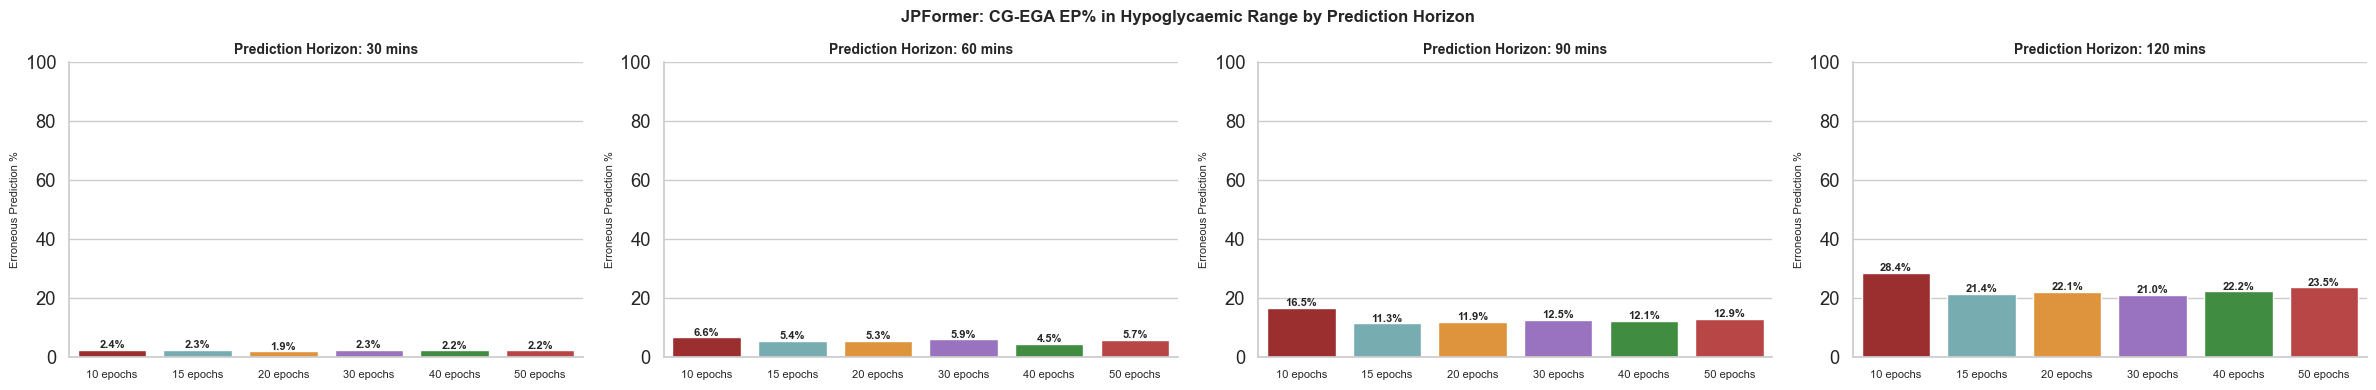


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,93.589496,4.054837,2.355667,4847.0,210.0,122.0,5179.0,39.729508
1,15 epochs,93.164704,4.518247,2.317050,4825.0,234.0,120.0,5179.0,40.208333
2,20 epochs,93.396409,4.692025,1.911566,4837.0,243.0,99.0,5179.0,48.858586
3,30 epochs,93.879127,3.823132,2.297741,4862.0,198.0,119.0,5179.0,40.857143
4,40 epochs,93.415717,4.402394,2.181888,4838.0,228.0,113.0,5179.0,42.814159
5,50 epochs,93.492952,4.286542,2.220506,4842.0,222.0,115.0,5179.0,42.104348



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,89.091947,4.283267,6.624786,4680.0,225.0,348.0,5253.0,13.448276
1,15 epochs,90.462593,4.150010,5.387398,4752.0,218.0,283.0,5253.0,16.791519
2,20 epochs,90.386446,4.283267,5.330287,4748.0,225.0,280.0,5253.0,16.957143
3,30 epochs,89.644013,4.454597,5.901390,4709.0,234.0,310.0,5253.0,15.190323
4,40 epochs,90.976585,4.568818,4.454597,4779.0,240.0,234.0,5253.0,20.423077
5,50 epochs,89.929564,4.340377,5.730059,4724.0,228.0,301.0,5253.0,15.694352



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,79.398237,4.082024,16.519739,4143.0,213.0,862.0,5218.0,4.806265
1,15 epochs,84.955922,3.717900,11.326179,4433.0,194.0,591.0,5218.0,7.500846
2,20 epochs,83.058643,5.001916,11.939440,4334.0,261.0,623.0,5218.0,6.956661
3,30 epochs,83.576083,3.947873,12.476044,4361.0,206.0,651.0,5218.0,6.698925
4,40 epochs,83.786892,4.101188,12.111920,4372.0,214.0,632.0,5218.0,6.917722
5,50 epochs,82.943657,4.177846,12.878498,4328.0,218.0,672.0,5218.0,6.440476



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,66.995550,4.585026,28.419423,3463.0,237.0,1469.0,5169.0,2.357386
1,15 epochs,74.424453,4.140066,21.435481,3847.0,214.0,1108.0,5169.0,3.472022
2,20 epochs,73.553879,4.352873,22.093248,3802.0,225.0,1142.0,5169.0,3.329247
3,30 epochs,75.043529,3.927259,21.029213,3879.0,203.0,1087.0,5169.0,3.568537
4,40 epochs,73.515187,4.314181,22.170633,3800.0,223.0,1146.0,5169.0,3.315881
5,50 epochs,72.547882,3.946605,23.505514,3750.0,204.0,1215.0,5169.0,3.086420


In [45]:
return_timepoint_summary(full_results_10_epochs, '10 epochs',
                         full_results_15_epochs, '15 epochs',
                         full_results_20_epochs, '20 epochs',
                         full_results_30_epochs, '30 epochs',
                         full_results_40_epochs, '40 epochs',
                         full_results_50_epochs, '50 epochs', glycemic_region='hypo')

/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  timepoint_df = pd.concat([timepoint_df, row], ignore_index=True)
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  timepoint_df = pd.concat([timepoint_df, row], ignore_index=True)
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of Data

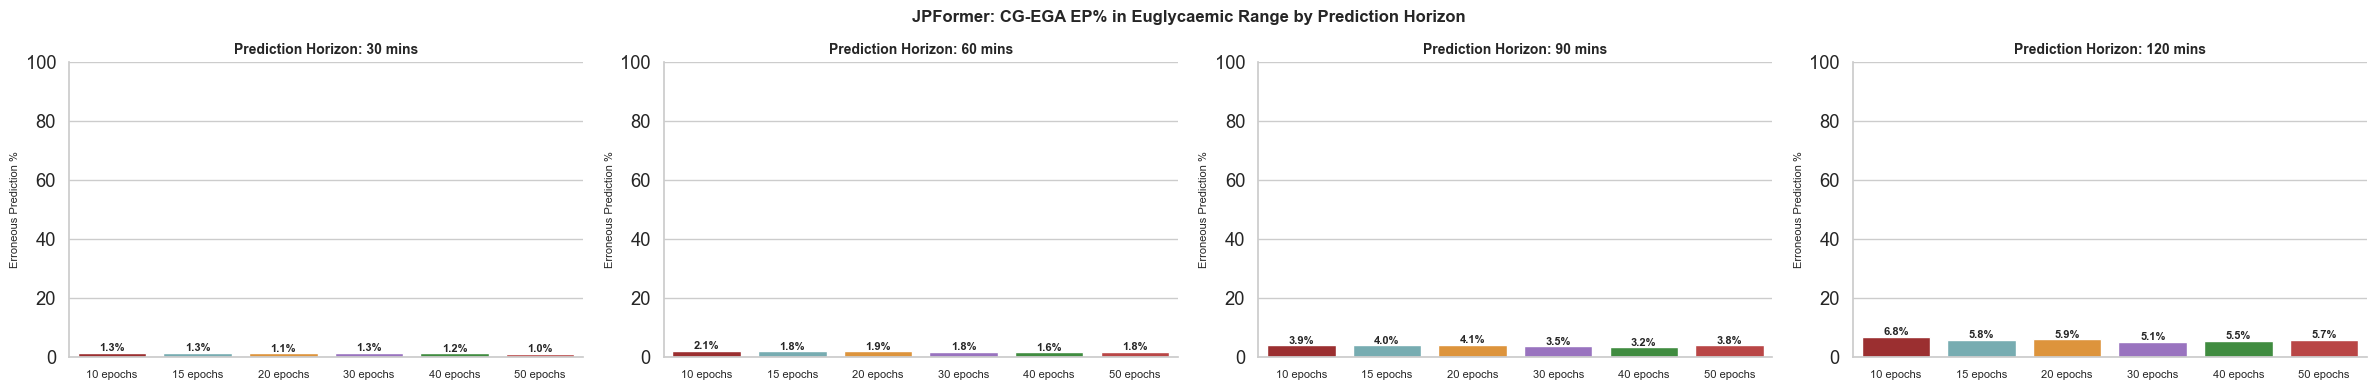


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,93.433822,5.287067,1.279111,85975.0,4865.0,1177.0,92017.0,73.045879
1,15 epochs,93.006727,5.697860,1.295413,85582.0,5243.0,1192.0,92017.0,71.796980
2,20 epochs,93.245813,5.605486,1.148701,85802.0,5158.0,1057.0,92017.0,81.175024
3,30 epochs,93.494680,5.229468,1.275851,86031.0,4812.0,1174.0,92017.0,73.280239
4,40 epochs,93.458817,5.381614,1.159568,85998.0,4952.0,1067.0,92017.0,80.597938
5,50 epochs,93.570753,5.412043,1.017203,86101.0,4980.0,936.0,92017.0,91.988248



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,92.304596,5.638002,2.057403,84839.0,5182.0,1891.0,91912.0,44.864622
1,15 epochs,92.395987,5.793585,1.810427,84923.0,5325.0,1664.0,91912.0,51.035457
2,20 epochs,92.287188,5.816433,1.896379,84823.0,5346.0,1743.0,91912.0,48.664945
3,30 epochs,92.621203,5.608626,1.770171,85130.0,5155.0,1627.0,91912.0,52.323294
4,40 epochs,93.228305,5.214771,1.556924,85688.0,4793.0,1431.0,91912.0,59.879804
5,50 epochs,92.696275,5.540082,1.763643,85199.0,5092.0,1621.0,91912.0,52.559531



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,90.831658,5.287631,3.880711,83606.0,4867.0,3572.0,92045.0,23.405935
1,15 epochs,90.615460,5.420175,3.964365,83407.0,4989.0,3649.0,92045.0,22.857495
2,20 epochs,90.479657,5.391928,4.128415,83282.0,4963.0,3800.0,92045.0,21.916316
3,30 epochs,91.095660,5.364767,3.539573,83849.0,4938.0,3258.0,92045.0,25.736341
4,40 epochs,91.649737,5.110544,3.239720,84359.0,4704.0,2982.0,92045.0,28.289403
5,50 epochs,90.506817,5.654843,3.838340,83307.0,5205.0,3533.0,92045.0,23.579677



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,87.076025,6.112178,6.811797,80278.0,5635.0,6280.0,92193.0,12.783121
1,15 epochs,89.117395,5.113186,5.769419,82160.0,4714.0,5319.0,92193.0,15.446513
2,20 epochs,88.529498,5.604547,5.865955,81618.0,5167.0,5408.0,92193.0,15.092086
3,30 epochs,89.830030,5.039428,5.130541,82817.0,4646.0,4730.0,92193.0,17.508879
4,40 epochs,89.255150,5.254195,5.490655,82287.0,4844.0,5062.0,92193.0,16.255828
5,50 epochs,88.963370,5.345308,5.691321,82018.0,4928.0,5247.0,92193.0,15.631408


In [46]:
return_timepoint_summary(full_results_10_epochs, '10 epochs',
                         full_results_15_epochs, '15 epochs',
                         full_results_20_epochs, '20 epochs',
                         full_results_30_epochs, '30 epochs',
                         full_results_40_epochs, '40 epochs',
                         full_results_50_epochs, '50 epochs', glycemic_region='eu')

/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  timepoint_df = pd.concat([timepoint_df, row], ignore_index=True)
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  timepoint_df = pd.concat([timepoint_df, row], ignore_index=True)
/var/folders/nc/jnhzrlxn59j2vq7476flb2wh0000gn/T/ipykernel_4853/989819935.py:45: FutureWarning: The behavior of Data

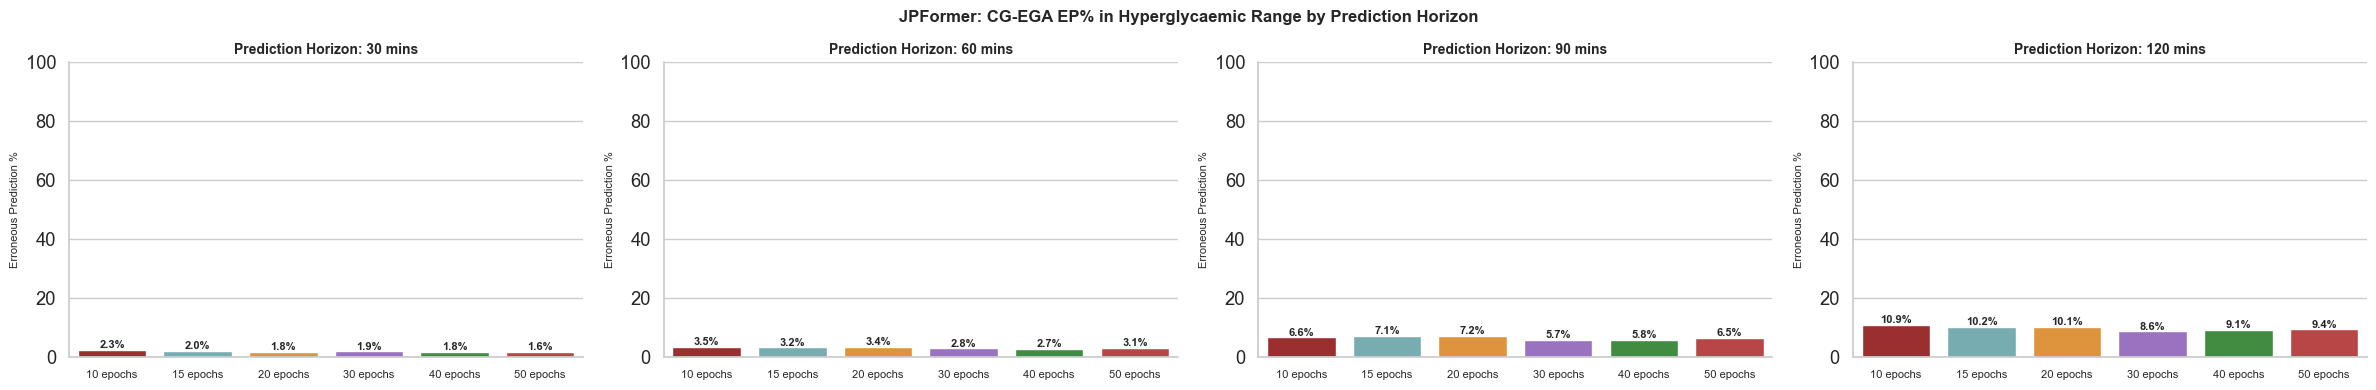


Prediction Horizon: 30 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,92.646532,5.076063,2.277405,41413.0,2269.0,1018.0,44700.0,40.680747
1,15 epochs,92.525727,5.501119,1.973154,41359.0,2459.0,882.0,44700.0,46.892290
2,20 epochs,92.149888,6.058166,1.791946,41191.0,2708.0,801.0,44700.0,51.424469
3,30 epochs,93.255034,4.854586,1.890380,41685.0,2170.0,845.0,44700.0,49.331361
4,40 epochs,92.919463,5.293065,1.787472,41535.0,2366.0,799.0,44700.0,51.983730
5,50 epochs,93.008949,5.355705,1.635347,41575.0,2394.0,731.0,44700.0,56.874145



Prediction Horizon: 60 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,90.100825,6.440723,3.458452,40303.0,2881.0,1547.0,44731.0,26.052359
1,15 epochs,90.518880,6.288704,3.192417,40490.0,2813.0,1428.0,44731.0,28.354342
2,20 epochs,90.547942,6.094208,3.357850,40503.0,2726.0,1502.0,44731.0,26.966045
3,30 epochs,91.207440,5.977957,2.814603,40798.0,2674.0,1259.0,44731.0,32.405083
4,40 epochs,91.819991,5.454830,2.725179,41072.0,2440.0,1219.0,44731.0,33.693191
5,50 epochs,90.934699,5.946659,3.118643,40676.0,2660.0,1395.0,44731.0,29.158423



Prediction Horizon: 90 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,87.872202,5.538503,6.589295,39220.0,2472.0,2941.0,44633.0,13.335600
1,15 epochs,87.038738,5.816324,7.144938,38848.0,2596.0,3189.0,44633.0,12.181875
2,20 epochs,87.282952,5.525060,7.191988,38957.0,2466.0,3210.0,44633.0,12.136137
3,30 epochs,88.024556,6.246499,5.728945,39288.0,2788.0,2557.0,44633.0,15.364881
4,40 epochs,88.745995,5.406314,5.847691,39610.0,2413.0,2610.0,44633.0,15.176245
5,50 epochs,87.598862,5.903704,6.497435,39098.0,2635.0,2900.0,44633.0,13.482069



Prediction Horizon: 120 minutes


,Model,AP_percent,BP_percent,EP_percent,AP_count,BP_count,EP_count,Total_count,AP:EP
0,10 epochs,83.437374,5.699016,10.863610,37158.0,2538.0,4838.0,44534.0,7.680446
1,15 epochs,85.090044,4.758162,10.151794,37894.0,2119.0,4521.0,44534.0,8.381774
2,20 epochs,84.324336,5.588988,10.086675,37553.0,2489.0,4492.0,44534.0,8.359973
3,30 epochs,86.682086,4.675080,8.642835,38603.0,2082.0,3849.0,44534.0,10.029358
4,40 epochs,86.293618,4.643643,9.062739,38430.0,2068.0,4036.0,44534.0,9.521804
5,50 epochs,86.087035,4.538106,9.374860,38338.0,2021.0,4175.0,44534.0,9.182754


In [47]:
return_timepoint_summary(full_results_10_epochs, '10 epochs',
                         full_results_15_epochs, '15 epochs',
                         full_results_20_epochs, '20 epochs',
                         full_results_30_epochs, '30 epochs',
                         full_results_40_epochs, '40 epochs',
                         full_results_50_epochs, '50 epochs', glycemic_region='hyper')

### **4.1. Statistical Analysis**

In [ ]:
# Function to compute Cramér's V
def cramers_v(chi2, n, contingency_table):
    """Computes Cramér's V effect size from the chi-square test."""
    min_dim = min(np.shape(contingency_table)) - 1  # Min(row-1, col-1)
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else np.nan

# Function to interpret Cramér's V effect size
def interpret_cramers_v(v_value):
    """Provides qualitative interpretation of Cramér's V."""
    if pd.isna(v_value):  
        return "Not Enough Data"
    elif v_value < 0.1:
        return "Negligible Effect"
    elif v_value < 0.3:
        return "Small Effect"
    elif v_value < 0.5:
        return "Medium Effect"
    else:
        return "Large Effect"

# Chi-square analysis function
def return_chi_square_analysis(model1, model2, glycemic_region, model1_name, model2_name):
    glycemic_region = glycemic_region.lower()
    data_dist_chi_square_results = []

    print(f"\n Running Chi-Square test for {model1_name} vs {model2_name} ({glycemic_region.capitalize()}glycaemic Range Performance):\n")

    # Copy data to avoid modifying the originals
    df1 = model1.copy()
    df2 = model2.copy()

    # Filter based on glycemic region
    if glycemic_region == 'hypo':
        df1 = df1[df1['glycemic_region'] == 'hypo']
        df2 = df2[df2['glycemic_region'] == 'hypo']
    elif glycemic_region == 'hyper':
        df1 = df1[df1['glycemic_region'] == 'hyper']
        df2 = df2[df2['glycemic_region'] == 'hyper']
    elif glycemic_region == 'eu':
        df1 = df1[df1['glycemic_region'] == 'eu']
        df2 = df2[df2['glycemic_region'] == 'eu']
    else:
        pass  # Use all data

    # Calculate class counts
    df1_counts = df1['CG_EGA_Class'].value_counts()
    df2_counts = df2['CG_EGA_Class'].value_counts()
    
    # Totals
    df1_total = df1_counts.sum()
    df2_total = df2_counts.sum()

    # Contingency table
    contingency_table = [
        [df1_counts.get('AP', 0), df1_counts.get('BE', 0), df1_counts.get('EP', 0)],
        [df2_counts.get('AP', 0), df2_counts.get('BE', 0), df2_counts.get('EP', 0)],
    ]

    # Percentages
    df1_percent = {
        'AP': (df1_counts.get('AP', 0) / df1_total) * 100 if df1_total else 0,
        'BE': (df1_counts.get('BE', 0) / df1_total) * 100 if df1_total else 0,
        'EP': (df1_counts.get('EP', 0) / df1_total) * 100 if df1_total else 0
    }
    df2_percent = {
        'AP': (df2_counts.get('AP', 0) / df2_total) * 100 if df2_total else 0,
        'BE': (df2_counts.get('BE', 0) / df2_total) * 100 if df2_total else 0,
        'EP': (df2_counts.get('EP', 0) / df2_total) * 100 if df2_total else 0
    }

    # Chi-square test
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Cramér's V
    n = np.sum(contingency_table)
    cramers_v_value = cramers_v(chi2, n, contingency_table)
    cramers_v_interpretation = interpret_cramers_v(cramers_v_value)

    # Store result
    data_dist_chi_square_results.append({
        "Model 1": f"{model1_name} ({glycemic_region.capitalize()})",
        "Model 2": f"{model2_name} ({glycemic_region.capitalize()})",
        "Chi2 Statistic": chi2,
        "p-value": p_value,
        "Significant": p_value < 0.05,
        "Cramér's V": cramers_v_value,
        "Cramér's V Interpretation": cramers_v_interpretation
    })

    # Display results
    print(f"\n  χ² = {chi2:.3f}, p = {p_value:.5f}, "
          f"{'Significant' if p_value < 0.05 else 'Not Significant'} | "
          f"Cramér's V = {cramers_v_value:.3f} ({cramers_v_interpretation})\n")

    # Contingency table (readable)
    table_data = pd.DataFrame({
        "AP (Accurate Predictions)": [f"{df1_counts.get('AP', 0)} ({df1_percent['AP']:.2f}%)", 
                                     f"{df2_counts.get('AP', 0)} ({df2_percent['AP']:.2f}%)"],
        "BE (Benign Errors)": [f"{df1_counts.get('BE', 0)} ({df1_percent['BE']:.2f}%)", 
                              f"{df2_counts.get('BE', 0)} ({df2_percent['BE']:.2f}%)"],
        "EP (Erroneous Predictions)": [f"{df1_counts.get('EP', 0)} ({df1_percent['EP']:.2f}%)", 
                                      f"{df2_counts.get('EP', 0)} ({df2_percent['EP']:.2f}%)"]
    }, index=[model1_name, model2_name])

    print("\nContingency Table:")
    display(table_data)
    print(f"\n{'_ _'*30}\n")
    return pd.DataFrame(data_dist_chi_square_results)

In [ ]:
overall_chi2_base_no_dout = return_chi_square_analysis(high_dimension_full_results, no_dropout_full_results, 'overall', '0.1 Dropout', 'No Dropout')
overall_chi2_base_high_dout = return_chi_square_analysis(high_dimension_full_results, high_dropout_full_results, 'overall', '0.1 Dropout', '0.2 Dropout')
overall_chi2_no_dout_high_dout = return_chi_square_analysis(no_dropout_full_results, high_dropout_full_results, 'overall', 'No Dropout', '0.2 Dropout')

In [ ]:
overall_chi2_base_no_dout = return_chi_square_analysis(high_dimension_full_results, no_dropout_full_results, 'hypo', '0.1 Dropout', 'No Dropout')
overall_chi2_base_high_dout = return_chi_square_analysis(high_dimension_full_results, high_dropout_full_results, 'hypo', '0.1 Dropout', '0.2 Dropout')
overall_chi2_no_dout_high_dout = return_chi_square_analysis(no_dropout_full_results, high_dropout_full_results, 'hypo', 'No Dropout', '0.2 Dropout')

In [ ]:
overall_chi2_base_no_dout = return_chi_square_analysis(high_dimension_full_results, no_dropout_full_results, 'eu', '0.1 Dropout', 'No Dropout')
overall_chi2_base_high_dout = return_chi_square_analysis(high_dimension_full_results, high_dropout_full_results, 'eu', '0.1 Dropout', '0.2 Dropout')
overall_chi2_no_dout_high_dout = return_chi_square_analysis(no_dropout_full_results, high_dropout_full_results, 'eu', 'No Dropout', '0.2 Dropout')

In [ ]:
overall_chi2_base_no_dout = return_chi_square_analysis(high_dimension_full_results, no_dropout_full_results, 'hyper', '0.1 Dropout', 'No Dropout')
overall_chi2_base_high_dout = return_chi_square_analysis(high_dimension_full_results, high_dropout_full_results, 'hyper', '0.1 Dropout', '0.2 Dropout')
overall_chi2_no_dout_high_dout = return_chi_square_analysis(no_dropout_full_results, high_dropout_full_results, 'hyper', 'No Dropout', '0.2 Dropout')